In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
train = pd.read_csv('datasets/titanic_train.csv')
test = pd.read_csv('datasets/titanic_test.csv')
drop_cols = ['PassengerId', 'Name', 'Ticket']
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [2]:
train.columns[train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

/home/wert/neuralnet/lib/python3.4/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


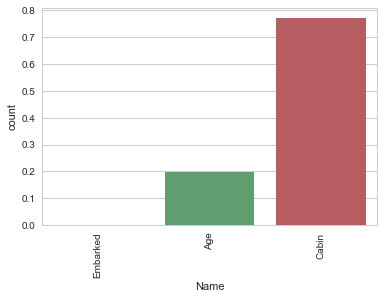

In [3]:
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

In [4]:
# No trend can be learned from cabin due to insufficient information.
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [5]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])

In [6]:
numeric_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [7]:
del numeric_data['Survived']
numeric_data.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


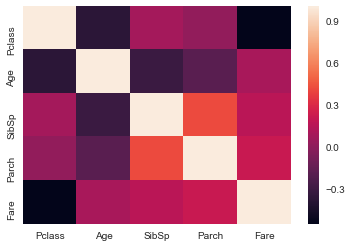

In [8]:
corr = numeric_data.corr()
sns.heatmap(corr)

In [9]:
numeric_data.columns[numeric_data.isnull().any()]

Index(['Age'], dtype='object')

In [10]:
numeric_data['Age'].fillna(numeric_data['Age'].mean(), inplace=True)

/home/wert/neuralnet/lib/python3.4/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
numeric_data.columns[numeric_data.isnull().any()]

Index([], dtype='object')

/home/wert/neuralnet/lib/python3.4/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


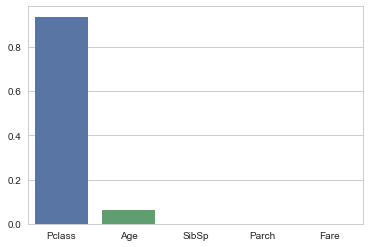

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(numeric_data.iloc[:,:].values)
variances = pca.explained_variance_ratio_
sns.barplot(x=numeric_data.columns, y=variances)

In [13]:
corr, variances

(          Pclass       Age     SibSp     Parch      Fare
 Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
 Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
 SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
 Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
 Fare   -0.549500  0.096067  0.159651  0.216225  1.000000,
 array([  9.35698508e-01,   6.34932088e-02,   4.75598133e-04,
          1.75390286e-04,   1.57294614e-04]))

In [14]:
numeric_data.drop(['SibSp', 'Parch', 'Fare'], axis=1, inplace=True)
numeric_data.head()

/home/wert/neuralnet/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0


In [15]:
survived = train['Survived']
numeric_data['Survived'] = survived
numeric_data.head()
numeric_data['Pclass'].unique()

/home/wert/neuralnet/lib/python3.4/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([3, 1, 2])

In [16]:
pivot = numeric_data.pivot_table(index='Age', values='Survived', aggfunc=np.mean)

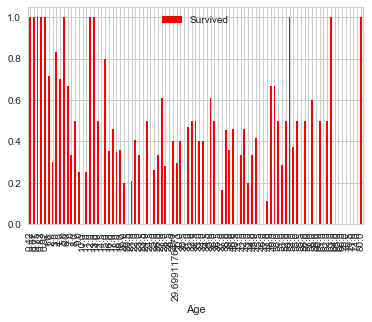

In [17]:
pivot.plot(kind='bar', color='red')

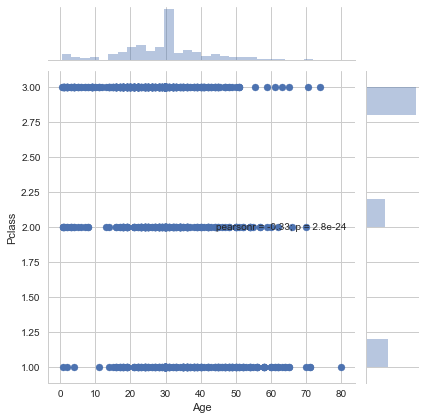

In [18]:
sns.jointplot(x=numeric_data['Age'], y=numeric_data['Pclass'])
plt.show()

In [19]:
cat_data.describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [20]:
cat_data['Embarked'].fillna('S', inplace=True)
cat_data.describe()

/home/wert/neuralnet/lib/python3.4/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


/home/wert/neuralnet/lib/python3.4/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


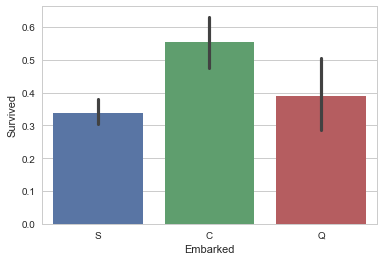

In [21]:
sns.barplot(x=cat_data['Embarked'], y=numeric_data['Survived'])

/home/wert/neuralnet/lib/python3.4/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


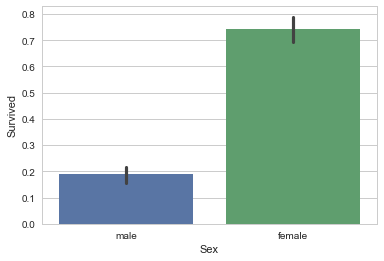

In [22]:
%matplotlib inline
sns.barplot(x=cat_data['Sex'], y=numeric_data['Survived'])

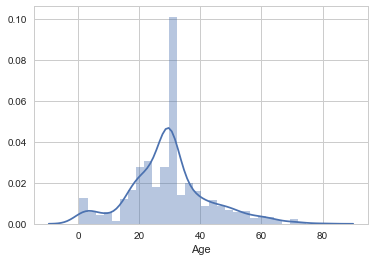

In [23]:
sns.distplot(numeric_data['Age'])

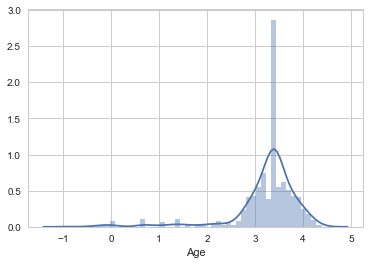

In [24]:
target = np.log(numeric_data['Age'])
sns.distplot(target)

In [25]:
numeric_data['Age'] = target

/home/wert/neuralnet/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/home/wert/neuralnet/lib/python3.4/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


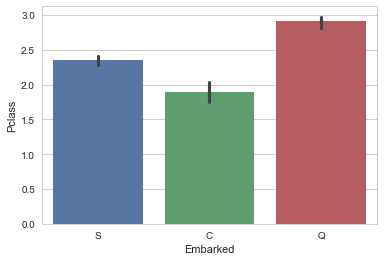

In [26]:
%matplotlib inline
sns.barplot(x=cat_data['Embarked'], y=numeric_data['Pclass'])

/home/wert/neuralnet/lib/python3.4/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


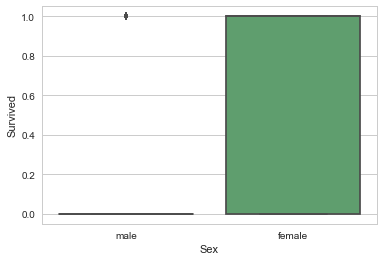

In [27]:
sns.boxplot(x=cat_data['Sex'], y=numeric_data['Survived'])

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data['Sex'] = le.fit_transform(cat_data['Sex'])

/home/wert/neuralnet/lib/python3.4/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
lenc = LabelEncoder()
cat_data['Embarked'] = lenc.fit_transform(cat_data['Embarked'])
cat_data.head()

/home/wert/neuralnet/lib/python3.4/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [30]:
train = pd.concat([cat_data, numeric_data], axis=1)

In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [32]:
test['Age'] = np.log(test['Age'])
del test['Fare'], test['SibSp'], test['Parch']

In [33]:
test.head()

,Pclass,Sex,Age,Embarked
0,3,male,3.540959,Q
1,3,female,3.850148,S
2,2,male,4.127134,Q
3,3,male,3.295837,S
4,3,female,3.091042,S


In [ ]:
le = LabelEncoder()
test['Sex'] = le.fit_transform(test['Sex'])
lenc = LabelEncoder()
test['Embarked'] = lenc.fit_transform(test['Embarked'])
test.head()

,Pclass,Sex,Age,Embarked
0,3,1,3.540959,1
1,3,0,3.850148,2
2,2,1,4.127134,1
3,3,1,3.295837,2
4,3,0,3.091042,2


In [ ]:
train.head()

In [ ]:
pclass = test['Pclass']
del test['Pclass']
age = test['Age']
del test['Age']
embarked = test['Embarked']
del test['Embarked']
test['Embarked'] = embarked
test['Pclass'] = pclass
test['Age'] = age
test.head()

In [ ]:
test.isnull().any()
test['Age'].fillna(train['Age'].mean(), inplace=True)
test.isnull().any()

In [ ]:
def onehot(onehot_df, df, column_name):
       onehot_df[column_name] = df[column_name]
       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

In [ ]:
onhotdf = pd.DataFrame()
onhotdf = onehot(onhotdf, train, 'Embarked')
onhotdf = onehot(onhotdf, train, 'Pclass')
onhotdf.head()

In [ ]:
onhotdf1 = pd.DataFrame()
onhotdf1 = onehot(onhotdf1, test, 'Embarked')
onhotdf1 = onehot(onhotdf1, test, 'Pclass')
onhotdf1.head()

In [ ]:
onhotdf['Age'] = train['Age']
onhotdf['Sex'] = train['Sex']
onhotdf1['Age'] = test['Age']
onhotdf1['Sex'] = test['Sex']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
onhotdf['Age'] = scale.fit_transform(train['Age'])
scale1 = StandardScaler()
onhotdf1['Age'] = scale1.fit_transform(test['Age'])

In [ ]:
survived = train['Survived']
train = onhotdf
test = onhotdf1
train.head(), test.head()

In [ ]:
import machine_learning_template.Classification_methods as clam
import machine_learning_template.Metrics as met
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
results = []
for tr, te in kfold.split(train.iloc[:,:].values):
    y_pred = clam.logistic_classification(train.iloc[tr,:].values, survived[tr], train.iloc[te,:].values)
    cm = met.confusion(y_pred, survived[te])
    results.append(met.accuracy(cm))
print(np.mean(results))

In [ ]:
import machine_learning_template.Classification_methods as clam
import machine_learning_template.Metrics as met
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
results = []
for tr, te in kfold.split(train.iloc[:,:].values):
    y_pred = clam.k_nearest_neighbors_classifier(train.iloc[tr,:].values, survived[tr], train.iloc[te,:].values)
    cm = met.confusion(y_pred, survived[te])
    results.append(met.accuracy(cm))
print(np.mean(results))

In [ ]:
import machine_learning_template.Classification_methods as clam
import machine_learning_template.Metrics as met
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
results = []
for tr, te in kfold.split(train.iloc[:,:].values):
    y_pred = clam.support_vector_classifier(train.iloc[tr,:].values, survived[tr], train.iloc[te,:].values, 'rbf')
    cm = met.confusion(y_pred, survived[te])
    results.append(met.accuracy(cm))
print(np.mean(results))

In [ ]:
import machine_learning_template.Classification_methods as clam
import machine_learning_template.Metrics as met
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
results = []
for tr, te in kfold.split(train.iloc[:,:].values):
    y_pred = clam.naive_bayes(train.iloc[tr,:].values, survived[tr], train.iloc[te,:].values)
    cm = met.confusion(y_pred, survived[te])
    results.append(met.accuracy(cm))
print(np.mean(results))

In [ ]:
import machine_learning_template.Classification_methods as clam
import machine_learning_template.Metrics as met
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
results = []
for tr, te in kfold.split(train.iloc[:,:].values):
    y_pred = clam.decision_tree_classification(train.iloc[tr,:].values, survived[tr], train.iloc[te,:].values)
    cm = met.confusion(y_pred, survived[te])
    results.append(met.accuracy(cm))
print(np.mean(results))

In [ ]:
import machine_learning_template.Classification_methods as clam
import machine_learning_template.Metrics as met
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
results = []
for tr, te in kfold.split(train.iloc[:,:].values):
    y_pred = clam.random_forest_classification(train.iloc[tr,:].values, survived[tr], train.iloc[te,:].values, 5)
    cm = met.confusion(y_pred, survived[te])
    results.append(met.accuracy(cm))
print(np.mean(results))

In [ ]:
import machine_learning_template.Classification_methods as clam
import machine_learning_template.Metrics as met
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
results = []
for tr, te in kfold.split(train.iloc[:,:].values):
    y_pred = clam.ann_classify(8, 50, 1, train.iloc[tr,:].values, survived[tr], train.iloc[te,:].values)
    cm = met.confusion(y_pred, survived[te])
    results.append(met.accuracy(cm))
print(np.mean(results))

In [44]:
import machine_learning_template.Classification_methods as clam
y_pred = clam.ann_classify(8, 50, 1, train.iloc[:,:].values, survived, test.iloc[:,:].values)

Using TensorFlow backend.
/home/wert/Documents/development/ml/kaggle/machine_learning_template/Classification_methods.py:63: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", input_dim=8, units=50, activation="relu")`
  model.add(Dense(output_dim=hidden, init='uniform', activation='relu', input_dim=input_dim))
/home/wert/Documents/development/ml/kaggle/machine_learning_template/Classification_methods.py:64: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="uniform", activation="sigmoid")`
  model.add(Dense(output_dim=output_dim, init='uniform', activation='sigmoid'))


Epoch 1/1000
891/891 [==============================] - 0s - loss: 0.6598 - acc: 0.6251     
Epoch 2/1000
891/891 [==============================] - 0s - loss: 0.5489 - acc: 0.7553     
Epoch 3/1000
891/891 [==============================] - 0s - loss: 0.4791 - acc: 0.7980     
Epoch 4/1000
891/891 [==============================] - 0s - loss: 0.4532 - acc: 0.8081     
Epoch 5/1000
891/891 [==============================] - 0s - loss: 0.4434 - acc: 0.8126     
Epoch 6/1000
891/891 [==============================] - 0s - loss: 0.4385 - acc: 0.8137     
Epoch 7/1000
891/891 [==============================] - 0s - loss: 0.4341 - acc: 0.8148     
Epoch 8/1000
891/891 [==============================] - 0s - loss: 0.4309 - acc: 0.8137     
Epoch 9/1000
891/891 [==============================] - 0s - loss: 0.4282 - acc: 0.8148     
Epoch 10/1000
891/891 [==============================] - 0s - loss: 0.4263 - acc: 0.8148     
Epoch 11/1000
891/891 [==============================] - 0s - loss: 0

891/891 [==============================] - 0s - loss: 0.4097 - acc: 0.8249     
Epoch 88/1000
891/891 [==============================] - 0s - loss: 0.4094 - acc: 0.8272     
Epoch 89/1000
891/891 [==============================] - 0s - loss: 0.4108 - acc: 0.8204     
Epoch 90/1000
891/891 [==============================] - 0s - loss: 0.4108 - acc: 0.8227     
Epoch 91/1000
891/891 [==============================] - 0s - loss: 0.4110 - acc: 0.8249     
Epoch 92/1000
891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8204     
Epoch 93/1000
891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8227     
Epoch 94/1000
891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8227     
Epoch 95/1000
891/891 [==============================] - 0s - loss: 0.4114 - acc: 0.8272     
Epoch 96/1000
891/891 [==============================] - 0s - loss: 0.4099 - acc: 0.8227     
Epoch 97/1000
891/891 [==============================] - 0s - loss: 0.4096

891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8171     
Epoch 174/1000
891/891 [==============================] - 0s - loss: 0.4087 - acc: 0.8215     
Epoch 175/1000
891/891 [==============================] - 0s - loss: 0.4063 - acc: 0.8227     
Epoch 176/1000
891/891 [==============================] - 0s - loss: 0.4086 - acc: 0.8238     
Epoch 177/1000
891/891 [==============================] - 0s - loss: 0.4069 - acc: 0.8238     
Epoch 178/1000
891/891 [==============================] - 0s - loss: 0.4068 - acc: 0.8227     
Epoch 179/1000
891/891 [==============================] - 0s - loss: 0.4061 - acc: 0.8238     
Epoch 180/1000
891/891 [==============================] - 0s - loss: 0.4070 - acc: 0.8260     
Epoch 181/1000
891/891 [==============================] - 0s - loss: 0.4079 - acc: 0.8238     
Epoch 182/1000
891/891 [==============================] - 0s - loss: 0.4080 - acc: 0.8238     
Epoch 183/1000
891/891 [==============================] - 0s - lo

891/891 [==============================] - 0s - loss: 0.4021 - acc: 0.8238     
Epoch 346/1000
891/891 [==============================] - 0s - loss: 0.4029 - acc: 0.8215     
Epoch 347/1000
891/891 [==============================] - 0s - loss: 0.4025 - acc: 0.8238     
Epoch 348/1000
891/891 [==============================] - 0s - loss: 0.4018 - acc: 0.8215     
Epoch 349/1000
891/891 [==============================] - 0s - loss: 0.4031 - acc: 0.8238     
Epoch 350/1000
891/891 [==============================] - 0s - loss: 0.4025 - acc: 0.8238     
Epoch 351/1000
891/891 [==============================] - 0s - loss: 0.4028 - acc: 0.8238     
Epoch 352/1000
891/891 [==============================] - 0s - loss: 0.4036 - acc: 0.8215     
Epoch 353/1000
891/891 [==============================] - 0s - loss: 0.4019 - acc: 0.8238     
Epoch 354/1000
891/891 [==============================] - 0s - loss: 0.4015 - acc: 0.8238     
Epoch 355/1000
891/891 [==============================] - 0s - lo

891/891 [==============================] - 0s - loss: 0.4010 - acc: 0.8215     
Epoch 432/1000
891/891 [==============================] - 0s - loss: 0.4008 - acc: 0.8215     
Epoch 433/1000
891/891 [==============================] - 0s - loss: 0.4001 - acc: 0.8249     
Epoch 434/1000
891/891 [==============================] - 0s - loss: 0.3997 - acc: 0.8249     
Epoch 435/1000
891/891 [==============================] - 0s - loss: 0.4001 - acc: 0.8249     
Epoch 436/1000
891/891 [==============================] - 0s - loss: 0.4023 - acc: 0.8238     
Epoch 437/1000
891/891 [==============================] - 0s - loss: 0.4017 - acc: 0.8249     
Epoch 438/1000
891/891 [==============================] - 0s - loss: 0.4022 - acc: 0.8204     
Epoch 439/1000
891/891 [==============================] - 0s - loss: 0.4007 - acc: 0.8249     
Epoch 440/1000
891/891 [==============================] - 0s - loss: 0.4024 - acc: 0.8260     
Epoch 441/1000
891/891 [==============================] - 0s - lo

891/891 [==============================] - 0s - loss: 0.3980 - acc: 0.8260     
Epoch 518/1000
891/891 [==============================] - 0s - loss: 0.3988 - acc: 0.8227     
Epoch 519/1000
891/891 [==============================] - 0s - loss: 0.3980 - acc: 0.8227     
Epoch 520/1000
891/891 [==============================] - 0s - loss: 0.3986 - acc: 0.8215     
Epoch 521/1000
891/891 [==============================] - 0s - loss: 0.3984 - acc: 0.8238     
Epoch 522/1000
891/891 [==============================] - 0s - loss: 0.3991 - acc: 0.8238     
Epoch 523/1000
891/891 [==============================] - 0s - loss: 0.3979 - acc: 0.8204     
Epoch 524/1000
891/891 [==============================] - 0s - loss: 0.3985 - acc: 0.8227     
Epoch 525/1000
891/891 [==============================] - 0s - loss: 0.3985 - acc: 0.8238     
Epoch 526/1000
891/891 [==============================] - 0s - loss: 0.3989 - acc: 0.8227     
Epoch 527/1000
891/891 [==============================] - 0s - lo

891/891 [==============================] - 0s - loss: 0.3966 - acc: 0.8238     
Epoch 604/1000
891/891 [==============================] - 0s - loss: 0.3976 - acc: 0.8227     
Epoch 605/1000
891/891 [==============================] - 0s - loss: 0.3969 - acc: 0.8238     
Epoch 606/1000
891/891 [==============================] - 0s - loss: 0.3969 - acc: 0.8215     
Epoch 607/1000
891/891 [==============================] - 0s - loss: 0.3978 - acc: 0.8238     
Epoch 608/1000
891/891 [==============================] - 0s - loss: 0.3973 - acc: 0.8238     
Epoch 609/1000
891/891 [==============================] - 0s - loss: 0.3965 - acc: 0.8260     
Epoch 610/1000
891/891 [==============================] - 0s - loss: 0.3976 - acc: 0.8249     
Epoch 611/1000
891/891 [==============================] - 0s - loss: 0.3968 - acc: 0.8249     
Epoch 612/1000
891/891 [==============================] - 0s - loss: 0.3960 - acc: 0.8227     
Epoch 613/1000
891/891 [==============================] - 0s - lo

891/891 [==============================] - 0s - loss: 0.3947 - acc: 0.8283     
Epoch 776/1000
891/891 [==============================] - 0s - loss: 0.3959 - acc: 0.8272     
Epoch 777/1000
891/891 [==============================] - 0s - loss: 0.3944 - acc: 0.8294     
Epoch 778/1000
891/891 [==============================] - 0s - loss: 0.3947 - acc: 0.8305     
Epoch 779/1000
891/891 [==============================] - 0s - loss: 0.3934 - acc: 0.8260     
Epoch 780/1000
891/891 [==============================] - 0s - loss: 0.3948 - acc: 0.8272     
Epoch 781/1000
891/891 [==============================] - 0s - loss: 0.3965 - acc: 0.8272     
Epoch 782/1000
891/891 [==============================] - 0s - loss: 0.3944 - acc: 0.8260     
Epoch 783/1000
891/891 [==============================] - 0s - loss: 0.3948 - acc: 0.8272     
Epoch 784/1000
891/891 [==============================] - 0s - loss: 0.3941 - acc: 0.8260     
Epoch 785/1000
891/891 [==============================] - 0s - lo

891/891 [==============================] - 0s - loss: 0.3933 - acc: 0.8260     
Epoch 862/1000
891/891 [==============================] - 0s - loss: 0.3945 - acc: 0.8260     
Epoch 863/1000
891/891 [==============================] - 0s - loss: 0.3943 - acc: 0.8272     
Epoch 864/1000
891/891 [==============================] - 0s - loss: 0.3944 - acc: 0.8260     
Epoch 865/1000
891/891 [==============================] - 0s - loss: 0.3934 - acc: 0.8294     
Epoch 866/1000
891/891 [==============================] - 0s - loss: 0.3938 - acc: 0.8272     
Epoch 867/1000
891/891 [==============================] - ETA: 0s - loss: 0.3964 - acc: 0.825 - 0s - loss: 0.3928 - acc: 0.8294     
Epoch 868/1000
891/891 [==============================] - 0s - loss: 0.3922 - acc: 0.8272     
Epoch 869/1000
891/891 [==============================] - 0s - loss: 0.3931 - acc: 0.8272     
Epoch 870/1000
891/891 [==============================] - 0s - loss: 0.3935 - acc: 0.8294     
Epoch 871/1000
891/891 [===

891/891 [==============================] - 0s - loss: 0.3922 - acc: 0.8294     
Epoch 948/1000
891/891 [==============================] - 0s - loss: 0.3911 - acc: 0.8294     
Epoch 949/1000
891/891 [==============================] - 0s - loss: 0.3915 - acc: 0.8316     
Epoch 950/1000
891/891 [==============================] - 0s - loss: 0.3923 - acc: 0.8272     
Epoch 951/1000
891/891 [==============================] - 0s - loss: 0.3914 - acc: 0.8260     
Epoch 952/1000
891/891 [==============================] - 0s - loss: 0.3935 - acc: 0.8283     
Epoch 953/1000
891/891 [==============================] - 0s - loss: 0.3919 - acc: 0.8283     
Epoch 954/1000
891/891 [==============================] - 0s - loss: 0.3906 - acc: 0.8283     
Epoch 955/1000
891/891 [==============================] - 0s - loss: 0.3925 - acc: 0.8294     
Epoch 956/1000
891/891 [==============================] - 0s - loss: 0.3924 - acc: 0.8305     
Epoch 957/1000
891/891 [==============================] - 0s - lo

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(train.iloc[:,:].values, survived)
y_pred = classifier.predict(test[:,:].values)

In [55]:
orig_test = pd.read_csv('datasets/titanic_test.csv')
y_pred = y_pred.astype(int)
dicto = {'PassengerId': orig_test['PassengerId'], 'Survived': y_pred}
df = pd.DataFrame(dicto)
df.to_csv('datasets/titanic_predictions.csv', index=False)